In [10]:
import scipy.stats as stats
from scipy.special import comb, perm, factorial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import math

### 베르누이 시행

결과가 두 가지 중 하나로만 나오는 실험이나 시행을 **베르누이 시행**(Bernoulli trial)이라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것도 베르누이 시행이다.

### 베르누이 확률변수

베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것을 **베르누이 확률변수(Bernoulli random variable)**라고 한다. 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)다. 

### 베르누이 확률분포

베르누이 확률변수의 분포를 베르누이 확률분포 혹은 베르누이분포라고 한다. 만약 어떤 확률변수 $X$가 베르누이분포에 의해 발생된다면 **’확률변수 $X$가 베르누이분포를 따른다’**라고 말하고 다음과 같이 수식으로 쓴다.

$$
\begin{align}
X \sim \text{Bern}(x;p)
\tag{1}
\end{align}
$$

베르누이분포의 확률질량함수 수식은 다음과 같다.

$$
\begin{align}
\text{Bern}(x;p) = 
\begin{cases} 
p   & \text{if }x=1, \\
1-p & \text{if }x=0
\end{cases}
\tag{2}
\end{align}
$$


베르누이분포의 모멘트는 다음과 같다.

* 기댓값(mean)

$$
\begin{align}
\text{E}[X]  = p
\tag{1}
\end{align}
$$

(증명)

$$
\begin{align}
\begin{aligned}
\text{E}[X] 
&= \sum_{x_i \in \Omega} x_i p(x_i) \\
&= 1 \cdot p + 0 \cdot (1 - p) \\
&= p
\end{aligned}
\tag{2}
\end{align}
$$


* 분산(variance)

$$
\begin{align}
\text{Var}[X] = p(1-p)
\tag{3}
\end{align}
$$

(증명)

$$
\begin{align}
\begin{aligned}
\text{Var}[X] 
&= \sum_{x_i \in \Omega} (x_i - p)^2 p(x_i) \\
&= (1 - p)^2 \cdot p + (0 - p)^2 \cdot (1 - p) \\
&= p(1-p)
\end{aligned}
\tag{4}
\end{align}
$$

In [7]:
p  = 1/10
rv = stats.bernoulli( mu )
xx = [ 1, 0 ]
rv.pmf( xx )

array([0.1, 0.9])

In [8]:
rv.mean()

0.1

In [9]:
rv.var()

0.09000000000000001

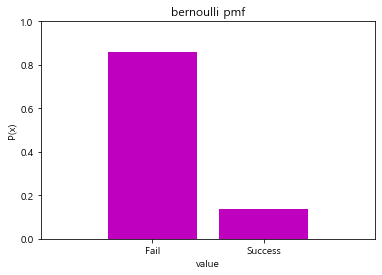

In [21]:
plt.xlim( -1,  2 ); plt.ylim( 0, 1 )
plt.xticks( [0, 1], ['Fail', 'Success'] )
plt.title( 'bernoulli pmf' )
plt.xlabel( 'value' );plt.ylabel( 'P(x)' )
plt.bar( xx, rv.pmf( xx ),color='m'); plt.show()

#### 주사위를 1개 던져서 3이 나올 확률을 구하시오.

In [12]:
p  = 1/6
rv = stats.bernoulli( p )
y  = [ 1, 0 ]
rv.pmf( y )

array([0.16666667, 0.83333333])

#### 주사위를 2개 던져서 눈금의 합이 6이 나올 확률을 구하시오.

In [16]:
p  = 5/36
rv = stats.bernoulli( p )
y  = [ 1, 0 ]
rv.pmf( y )

array([0.13888889, 0.86111111])

1000 개의 사탕이 들어있는 바구니가 
있다( 갈색, 파랑, 보라)
100개 뽑음. 그중 갈색 사탕 비율 36%
갈색사탕이 몇%정도 들어있는지 
신뢰구간 95%로 추정하시요.
( 실제 갈색사탕의비율 40.3%)

In [70]:
def CI(p, n, z):
    L = p - z*( math.sqrt( (p*(1-p))/ n) )
    U = p + z*( math.sqrt( (p*(1-p))/ n) )
    print( '신뢰구간 :', ( L, U ) )
    print("갈색사탕은 40.3% +-", U-L,"%p로 들어있다.")
n = 100
p = 0.36
t =  stats.t.ppf( 0.975, df=n-1 )
CI(p, n, z)

신뢰구간 : (0.26592, 0.45408)
갈색사탕은 40.3% +- 0.18816 %p로 들어있다.


In [71]:
def CI(p, n, t):
    L = p - t*( math.sqrt( (p*(1-p))/ n) )
    U = p + t*( math.sqrt( (p*(1-p))/ n) )
    print( '신뢰구간 :', ( L, U ) )
    print("갈색사탕은 40.3% +-", U-L,"%p로 들어있다.")
n = 50
p = 20/n
t = stats.t.ppf( 0.995, df=n-1 )
CI(p, n, z)

신뢰구간 : (0.2642072166866001, 0.5357927833134)
갈색사탕은 40.3% +- 0.2715855666267999 %p로 들어있다.


### 이항분포

베르누이분포를 따르는 확률변수 $Y$의 확률질량함수를 대입하여 정리하면 이항분포 확률변수 $X$의 확률질량함수는 다음과 같아진다.

$$
\begin{align}
\text{Bin}(x;n,p) = \binom n x \; p^x(1-p)^{n-x}
\tag{1}
\end{align}
$$

이 식에서 $\binom n x$ 기호는 **조합(combination)**이라는 기호로 $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$
\begin{align}
\binom n x =\dfrac{n!}{x!(n-x)!}
\tag{2}
\end{align}
$$

$!$ 기호는 **팩토리얼(factorial)**이라고 하며 다음처럼 정의한다.

$$
\begin{align}
n! = n\cdot (n-1) \cdots 2 \cdot 1
\tag{3}
\end{align}
$$

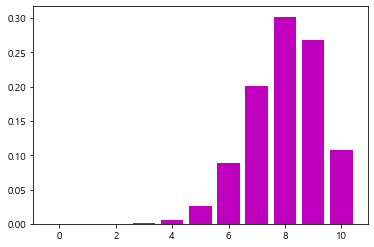

In [34]:
n  = 10
p  = 4/5
rv = stats.binom( n, p )
xx = np.arange( n+1 )
plt.bar( xx, rv.pmf( xx ), color='m' )
plt.show()


#### 조합(combination)

In [5]:
comb(10, 3)

120.0

In [13]:
factorial(10) / ( factorial(7)*factorial(3) )

120.0

#### 팩토리얼(Factorial)

In [11]:
factorial(10)

3628800.0

#### 주사위를 10번 던졌을때 눈금 5가 3번나올 확률

In [16]:
n = 10
p = 1/6
rv = stats.binom( n, p )
rv.pmf( 3 )

0.15504535957425197

#### 한 축구 선숫가 패널티킥을 차면 5번 중 4번을 성공한다고 한다. 그럼 이 선수가 10번의 페널티킥을 차서 7번 성공할 확률을 구하시오.

In [19]:
n = 10
p = 4/5
rv = stats.binom( n, p )
rv.pmf( 7 )

0.20132659200000014

#### 스마트폰의 한 부품을 맏는 회사가 있는데, 이 회사에서 만드는 부품의 불량률은 5%라고 한다. 그럼 부품 20개를 조사했을 때. 불량품이 2개 이하러 나올 확률을 구하시오.

In [28]:
n = 20
p = 0.05
rv = stats.binom( n, p )
rv.cdf(2) # rv.pmf( 2 ) + rv.pmf(1) + rv.pmf(0)

0.9245163262115033

#### 어떤 희귀 바이러스에 감염되었을 때, 회복할 수 있는 치료율은 20%라고 한다. 그럼 바이러스에 감염된 환자가 15명을 치료했을 때, 적어도 2명 이상은 회복할 확률 구하시오.

In [33]:
n = 15
p = 0.2
rv = stats.binom( n, p )
1 - rv.cdf(1) 

0.8328742325780478